Observe the outliers of base value in 3 proto projects


In [74]:
from pymongo import MongoClient
import sys, os
sys.path.append('/Users/bogao/Desktop/projects/Relative copy number/Python/mecan')
import mecan4cna.algorithms as alg
import mecan4cna.common as comm

import numpy as np
import importlib

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [6]:
db = MongoClient()['Rebased']['breast']
data = []
for s in db.find({},{'_id':0}):
    try:
        if (s['base'] > 2.3) or (s['base'] < 1.7):
            data.append(s)
    except:
        pass

In [9]:
len(data)

880

In [295]:
importlib.reload(alg)
m = alg.mecan()
m.showplot = True

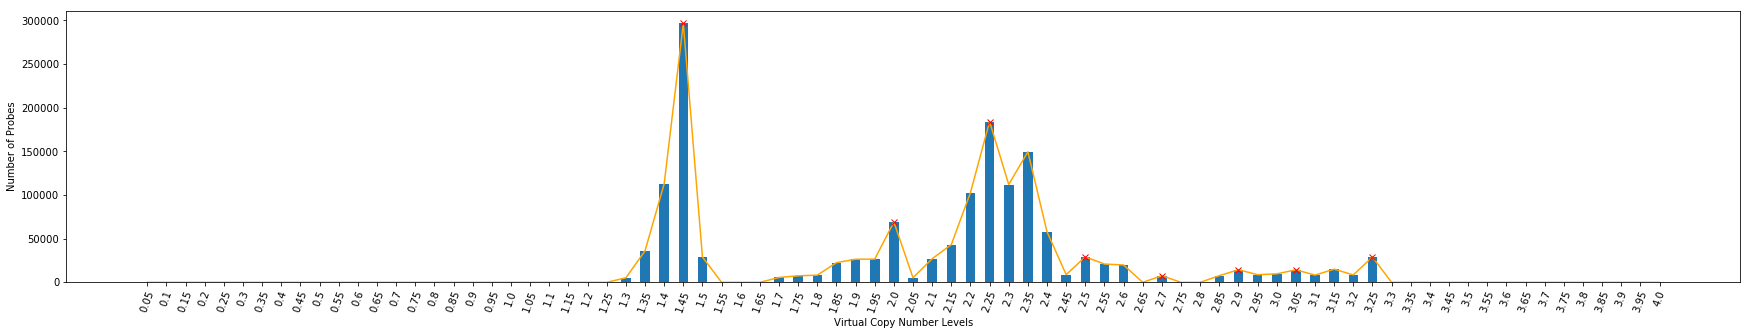

(2.25,
 0.8,
        score  neglects  base_bin  thresh_bin  base_value  thresh_value  \
 0   0.147700   69113.0      1.45        2.25      296527        184108   
 1   0.147700   69113.0      2.25        1.45      184108        296527   
 2   0.147700  105844.0      2.25        3.05      184108         14372   
 3   0.147700  105844.0      3.05        2.25       14372        184108   
 4   0.321121   22062.0      3.25        2.25       29001        184108   
 5   0.321121   22062.0      2.25        3.25      184108         29001   
 6   0.343479       0.0      1.45        2.00      296527         69113   
 7   0.343479       0.0      2.00        1.45       69113        296527   
 8   0.335912   69113.0      1.45        2.50      296527         29122   
 9   0.335912   69113.0      2.50        1.45       29122        296527   
 10  0.419391   98235.0      2.70        2.25        7609        184108   
 11  0.419391   98235.0      2.25        2.70      184108          7609   
 12  0.41998

In [109]:
m.showplot = True
m.peak_thresh = 5000
m.run(data[1]['segments'])

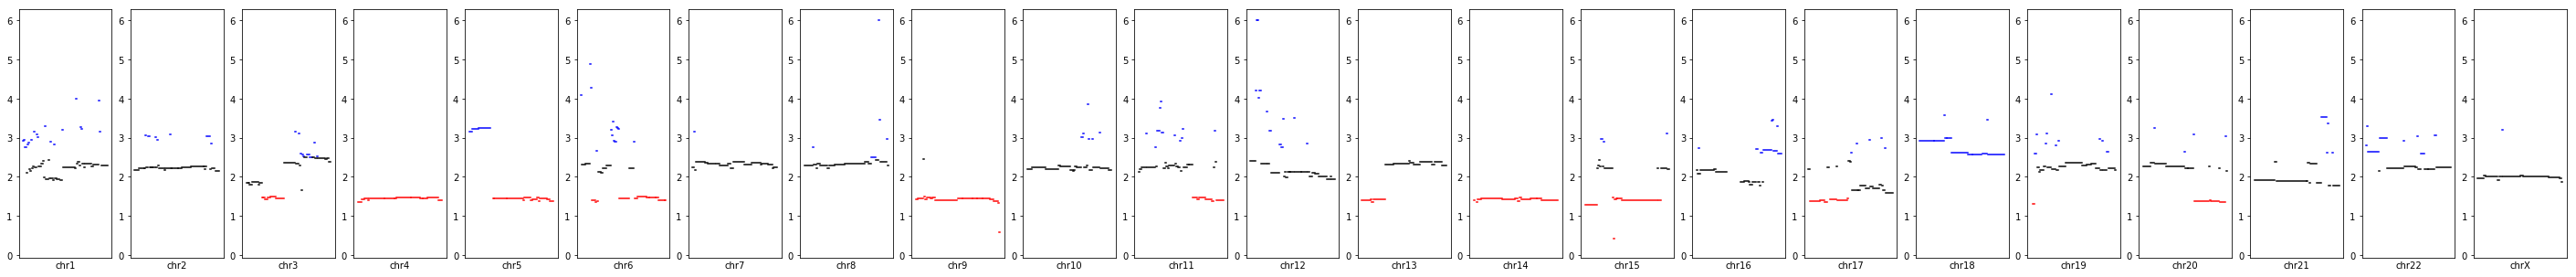

In [18]:
comm.plotSegments(data[1]['segments'])

In [19]:
m.bins_per_interval

20

In [25]:
sam = db.find_one({'base': {'$gt':3}})

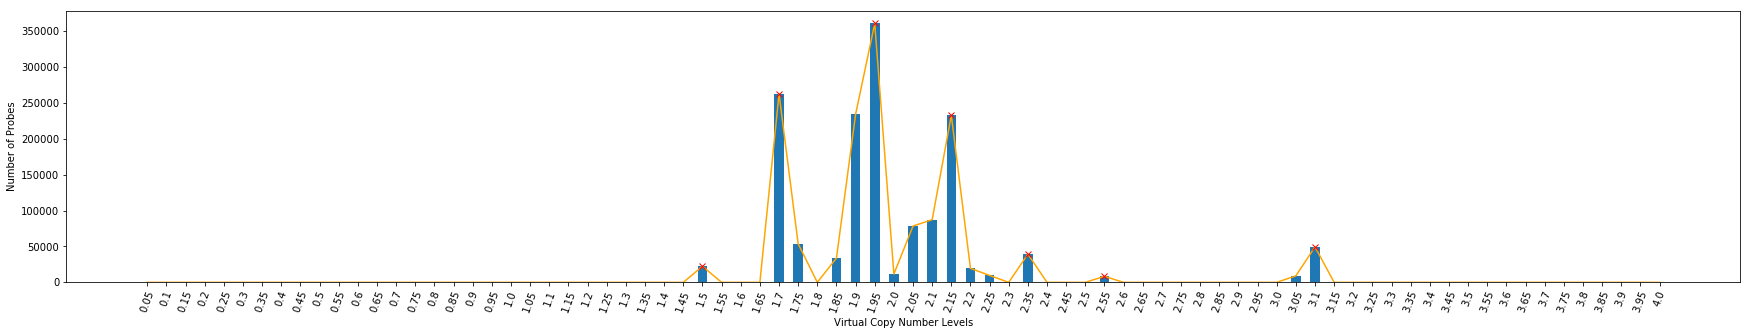

(1.95,
 1.15,
       score  neglects  base_bin  thresh_bin  base_value  thresh_value  \
 0  0.343351   70070.0      1.95        3.10      360357         49334   
 1  0.343351   70070.0      3.10        1.95       49334        360357   
 2  0.636557   39312.0      3.10        2.55       49334          8396   
 3  0.636557   39312.0      2.55        3.10        8396         49334   
 4  0.683989  262309.0      1.50        1.95       22362        360357   
 5  0.683989  262309.0      1.95        1.50      360357         22362   
 6  0.682120  232414.0      2.55        1.70        8396        262309   
 7  0.682120  232414.0      1.70        2.55      262309          8396   
 
    model_value  rank  levelScore  dupLevels    ...     score_28  rank_28  \
 0       409691     4           1          1    ...     0.206394        3   
 1       409691     4          -1          0    ...     0.206394        3   
 2        57730    12          -6          0    ...     0.446416        8   
 3        

In [108]:
m.peak_thresh = 5000
m.run(sam['segments'])

In [28]:
sam

{'_id': ObjectId('5d5d02638514e908583ab824'),
 'age': 18059,
 'base': 3.1,
 'file_path': '/Volumes/originalData/TCGA/2019-02-07_TCGA_masked_CNA/21814e56-4547-4c40-bfaf-27a7e853ca07/EMMER_p_8TCGA_Mx_242_238_N_GenomeWideSNP_6_B01_1244780.nocnv_grch38.seg.v2.txt',
 'gender': 'female',
 'level_distance': 0.55,
 'morphology': '8500/3',
 'project': 'TCGA-BRCA',
 'sample_id': '21814e56-4547-4c40-bfaf-27a7e853ca07',
 'segments': [{'chro': '1',
   'end': 72201868,
   'probes': 39481,
   'start': 3301765,
   'value': -0.0439},
  {'chro': '1',
   'end': 74691270,
   'probes': 1328,
   'start': 72204501,
   'value': 0.0886},
  {'chro': '1',
   'end': 108075979,
   'probes': 19974,
   'start': 74691640,
   'value': -0.0518},
  {'chro': '1',
   'end': 119959141,
   'probes': 7223,
   'start': 108082260,
   'value': 0.0992},
  {'chro': '1',
   'end': 149993982,
   'probes': 58,
   'start': 119962478,
   'value': -0.0352},
  {'chro': '1',
   'end': 152772486,
   'probes': 1214,
   'start': 150002511,


In [34]:
m.peak_thresh = 1000
m.computePeaks(sam['segments'])

,value,bin
0,22362,1.50
1,262309,1.70
2,360357,1.95
3,232414,2.15
4,39312,2.35
5,8396,2.55
6,4702,2.80
7,49334,3.10
8,1336,3.25
9,1187,3.40


In [83]:
# m.peak_thresh = 5000
peaks = m.computePeaks(sam['segments'])
models = m.computeModels(peaks)

In [89]:
models

,score,neglects,base_bin,thresh_bin,base_value,thresh_value,model_value,rank,levelScore,dupLevels,delLevels
0,0.234980,0.0,1.95,2.15,360357,232414,592771,0,13,16,-3
1,0.234980,0.0,2.15,1.95,232414,360357,592771,0,5,11,-6
2,0.234980,0.0,2.35,2.55,39312,8396,47708,1,-3,7,-10
3,0.234980,0.0,2.55,2.35,8396,39312,47708,1,-11,4,-15
4,0.234980,0.0,2.15,2.35,232414,39312,271726,2,5,11,-6
5,0.234980,0.0,2.35,2.15,39312,232414,271726,2,-3,7,-10
6,0.254339,0.0,1.95,1.70,360357,262309,622666,3,8,11,-3
7,0.254339,0.0,1.70,1.95,262309,360357,622666,3,15,16,-1
8,0.346743,70070.0,1.95,3.10,360357,49334,409691,4,1,1,0
9,0.346743,70070.0,3.10,1.95,49334,360357,409691,4,-1,0,-1


In [90]:
m.integrateModels(sam['segments'])

,score,neglects,base_bin,thresh_bin,base_value,thresh_value,model_value,rank,levelScore,dupLevels,delLevels,score_22,rank_22,score_24,rank_24,score_26,rank_26,score_28,rank_28
0,0.234980,0.0,1.95,2.15,360357,232414,592771,0,13,16,-3,0.187132,0,0.065277,0,0.032135,0,0.070621,0
1,0.234980,0.0,2.15,1.95,232414,360357,592771,0,5,11,-6,0.187132,0,0.065277,0,0.032135,0,0.070621,0
2,0.234980,0.0,2.35,2.55,39312,8396,47708,1,-3,7,-10,0.701118,23,0.130018,3,0.450697,15,0.460953,11
3,0.234980,0.0,2.55,2.35,8396,39312,47708,1,-11,4,-15,0.701118,23,0.130018,3,0.450697,15,0.460953,11
4,0.234980,0.0,2.15,2.35,232414,39312,271726,2,5,11,-6,0.516587,8,0.130018,4,0.274400,5,0.416901,8
5,0.234980,0.0,2.35,2.15,39312,232414,271726,2,-3,7,-10,0.516587,8,0.130018,4,0.274400,5,0.416901,8
6,0.254339,0.0,1.95,1.70,360357,262309,622666,3,8,11,-3,0.298605,2,0.089316,1,0.078957,1,0.072060,1
7,0.254339,0.0,1.70,1.95,262309,360357,622666,3,15,16,-1,0.298605,2,0.089316,1,0.078957,1,0.072060,1
8,0.346743,70070.0,1.95,3.10,360357,49334,409691,4,1,1,0,0.287204,1,0.271315,5,0.165167,2,0.208625,3
9,0.346743,70070.0,3.10,1.95,49334,360357,409691,4,-1,0,-1,0.287204,1,0.271315,5,0.165167,2,0.208625,3


In [91]:
m.integrateScores(sam['segments'])

,score,neglects,base_bin,thresh_bin,base_value,thresh_value,model_value,rank,levelScore,dupLevels,...,score_28,rank_28,neglects_ratio,dist,ave_rank,ave_score,ave_SS,ar_rank,as_rank,ass_rank
0,0.346743,70070.0,1.95,3.10,360357,49334,409691,4,1,1,...,0.208625,3,0.071559,1.15,3.0,0.255811,0.000000,0,0,0
1,0.346743,70070.0,3.10,1.95,49334,360357,409691,4,-1,0,...,0.208625,3,0.071559,1.15,3.0,0.255811,0.000000,1,1,1
2,0.500996,61674.0,1.95,2.80,360357,4702,365059,7,0,1,...,0.307304,4,0.062985,0.85,5.2,0.380487,0.326358,2,2,2
3,0.500996,61674.0,2.80,1.95,4702,360357,365059,7,-3,0,...,0.307304,4,0.062985,0.85,5.2,0.380487,0.326358,3,3,3
4,0.592652,271726.0,1.70,2.80,262309,4702,267011,10,1,1,...,0.424991,9,0.277502,1.10,10.6,0.499550,0.649654,4,4,4
5,0.592652,271726.0,2.80,1.70,4702,262309,267011,10,-1,0,...,0.424991,9,0.277502,1.10,10.6,0.499550,0.649654,5,5,5
6,0.598839,0.0,2.80,3.10,4702,49334,54036,11,-9,1,...,0.542158,18,0.000000,0.30,12.0,0.506359,0.678040,6,6,6
7,0.642429,44014.0,3.10,2.55,49334,8396,57730,17,-6,0,...,0.450051,10,0.044950,0.55,15.2,0.547006,0.756565,7,7,7
8,0.642429,44014.0,2.55,3.10,8396,49334,57730,17,-2,1,...,0.450051,10,0.044950,0.55,15.2,0.547006,0.756565,8,8,8
9,0.685424,262309.0,1.95,1.50,360357,22362,382719,18,5,6,...,0.468177,13,0.267885,0.45,16.4,0.550440,0.768724,9,9,9


In [47]:
peaks = m.computePeaks(sam['segments'])

In [48]:
peaks

,value,bin
0,22362,1.50
1,262309,1.70
2,360357,1.95
3,232414,2.15
4,39312,2.35
5,8396,2.55
6,49334,3.10


In [49]:
m.modelScore(peaks, 2,6,showtable=True)

    value   bin  dist        cn  round   off    weight  scaled_off
0   22362  1.50  0.45  0.391304    0.0  0.39  0.062055    0.024202
1  262309  1.70  0.25  0.217391    0.0  0.22  0.727914    0.160141
2  360357  1.95  0.00  0.000000    0.0  0.00  1.000000    0.000000
3  232414  2.15  0.20  0.173913    0.0  0.17  0.644955    0.109642
4   39312  2.35  0.40  0.347826    0.0  0.35  0.109092    0.038182
5    8396  2.55  0.60  0.521739    1.0  0.48  0.023299    0.011184
6   49334  3.10  1.15  1.000000    1.0  0.00  0.136903    0.000000


(0.3433506772450653, 332379)

In [50]:
peaks

,value,bin,dist,cn,round,off,weight,scaled_off
0,22362,1.50,0.45,0.391304,0.0,0.39,0.062055,0.024202
1,262309,1.70,0.25,0.217391,0.0,0.22,0.727914,0.160141
2,360357,1.95,0.00,0.000000,0.0,0.00,1.000000,0.000000
3,232414,2.15,0.20,0.173913,0.0,0.17,0.644955,0.109642
4,39312,2.35,0.40,0.347826,0.0,0.35,0.109092,0.038182
5,8396,2.55,0.60,0.521739,1.0,0.48,0.023299,0.011184
6,49334,3.10,1.15,1.000000,1.0,0.00,0.136903,0.000000


In [51]:
df = peaks

In [52]:
df[(df.cn < 0.8) & (df.cn > 0.2)]

,value,bin,dist,cn,round,off,weight,scaled_off
0,22362,1.50,0.45,0.391304,0.0,0.39,0.062055,0.024202
1,262309,1.70,0.25,0.217391,0.0,0.22,0.727914,0.160141
4,39312,2.35,0.40,0.347826,0.0,0.35,0.109092,0.038182
5,8396,2.55,0.60,0.521739,1.0,0.48,0.023299,0.011184


In [96]:
base_level = 2
thresh_level = 1
level_mean = np.mean(models.levelScore)
level_std = np.std(models.levelScore)
level_thresh = max(abs(level_mean - level_std), abs(level_mean + level_std))
if level_thresh < 9:
    level_thresh = 9
ref_level = max(level_thresh - base_level, level_thresh - thresh_level )
print((level_thresh - base_level) / ref_level)
print((level_thresh - thresh_level) / ref_level)

0.875
1.0


In [93]:
ref_level

10

In [73]:
peaks = m.computePeaks(data[1]['segments'])
m.levelScore(peaks,69113, 1.45)

[-1, 0, -1]

In [69]:
m.computeModels(peaks)

,score,neglects,base_bin,thresh_bin,base_value,thresh_value,model_value,rank,levelScore,dupLevels,delLevels
0,0.101422,0.0,3.25,3.45,29001,4145,33146,0,1,1,0
1,0.101422,0.0,3.45,3.25,4145,29001,33146,0,1,1,0
2,0.101422,0.0,3.05,3.25,14372,29001,43373,1,1,1,0
3,0.101422,0.0,3.25,3.05,29001,14372,43373,1,1,1,0
4,0.154690,105844.0,2.25,3.05,184108,14372,198480,2,-1,0,-1
5,0.154690,105844.0,3.05,2.25,14372,184108,198480,2,-1,0,-1
6,0.154690,69113.0,1.45,2.25,296527,184108,480635,3,-1,0,-1
7,0.154690,69113.0,2.25,1.45,184108,296527,480635,3,-1,0,-1
8,0.195177,43454.0,3.05,3.45,14372,4145,18517,4,-1,0,-1
9,0.195177,43454.0,3.45,3.05,4145,14372,18517,4,-1,0,-1


In [70]:
m.integrateScores(data[1]['segments'])

,score,neglects,base_bin,thresh_bin,base_value,thresh_value,model_value,rank,levelScore,dupLevels,...,score_28,rank_28,neglects_ratio,dist,ave_rank,ave_score,ave_SS,ar_rank,as_rank,ass_rank
0,0.154690,69113.0,1.45,2.25,296527,184108,480635,3,-1,0,...,0.243127,2.0,0.106582,0.80,1.2,0.222771,0.000000,0,0,0
1,0.154690,69113.0,2.25,1.45,184108,296527,480635,3,-1,0,...,0.243127,2.0,0.106582,0.80,1.2,0.222771,0.000000,1,1,1
2,0.154690,105844.0,2.25,3.05,184108,14372,198480,2,-1,0,...,0.415633,13.0,0.163226,0.80,9.0,0.344232,0.223717,4,2,2
3,0.154690,105844.0,3.05,2.25,14372,184108,198480,2,-1,0,...,0.415633,13.0,0.163226,0.80,9.0,0.344232,0.223717,5,3,3
4,0.323917,22062.0,3.25,2.25,29001,184108,213109,7,-1,0,...,0.401673,10.0,0.034023,1.00,7.0,0.364637,0.263152,2,4,4
5,0.323917,22062.0,2.25,3.25,184108,29001,213109,7,-1,0,...,0.401673,10.0,0.034023,1.00,7.0,0.364637,0.263152,3,5,5
6,0.348511,0.0,1.45,2.00,296527,69113,365640,9,3,3,...,0.411802,12.0,0.000000,0.55,9.0,0.381296,0.291438,6,6,6
7,0.348511,0.0,2.00,1.45,69113,296527,365640,9,3,3,...,0.411802,12.0,0.000000,0.55,9.0,0.381296,0.291438,7,7,7
8,0.337309,69113.0,1.45,2.50,296527,29122,325649,8,-1,0,...,0.403188,11.0,0.106582,1.05,10.0,0.394627,0.311462,8,9,8
9,0.337309,69113.0,2.50,1.45,29122,296527,325649,8,-1,0,...,0.403188,11.0,0.106582,1.05,10.0,0.394627,0.311462,9,8,9


<module 'mecan4cna.algorithms' from '/Users/bogao/Desktop/projects/Relative copy number/Python/mecan/mecan4cna/algorithms.py'>

In [215]:
db =  MongoClient()['Rebased']['breast_tcga']

In [232]:
sam = db.find_one({'base': {'$gt':2.3}})

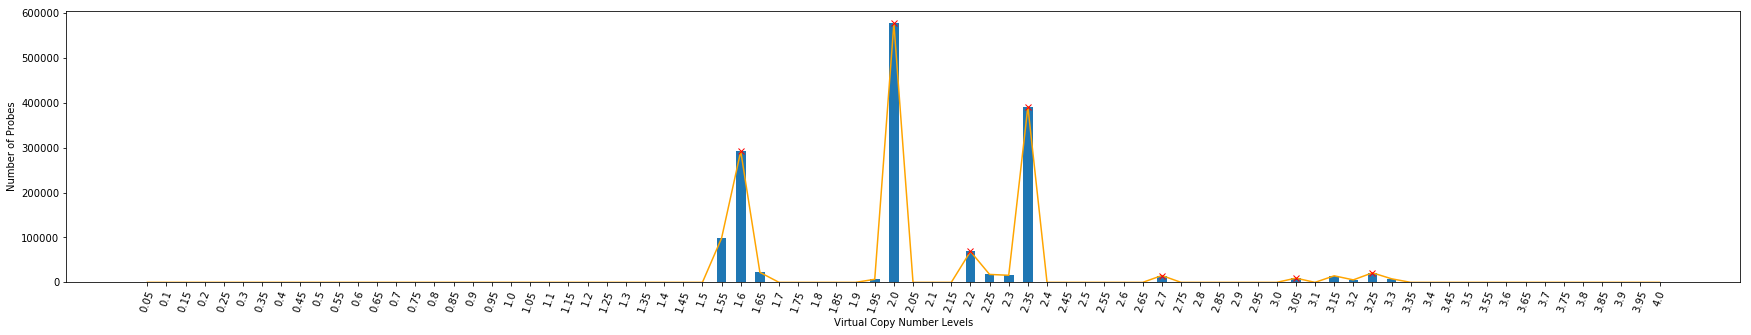

(2.0,
 0.35,
        score  neglects  base_bin  thresh_bin  base_value  thresh_value  \
 0   0.138052   68849.0      2.00        2.35      576780        391498   
 1   0.138052   68849.0      2.35        2.00      391498        576780   
 2   0.158690       0.0      1.60        2.00      292066        576780   
 3   0.158690       0.0      2.00        1.60      576780        292066   
 4   0.138052       0.0      2.70        3.05       15181          9392   
 5   0.138052       0.0      3.05        2.70        9392         15181   
 6   0.138052   68849.0      2.35        2.70      391498         15181   
 7   0.138052   68849.0      2.70        2.35       15181        391498   
 8   0.385379  307247.0      3.25        2.00       21235        576780   
 9   0.385379  307247.0      2.00        3.25      576780         21235   
 10  0.518495  307247.0      3.25        2.20       21235         68849   
 11  0.518495  307247.0      2.20        3.25       68849         21235   
 12  0.52865

In [294]:
m.peak_thresh = 5000
m.run(sam['segments'])

In [274]:
peaks = m.computePeaks(sam['segments'])

In [118]:
m.levelScore(peaks, 2, 2.35)

[9, 10, -1]

In [119]:
m.levelScore(peaks, 2.35, 2)

[3, 6, -3]

In [275]:
models = m.computeModels(peaks)
models

,score,neglects,base_bin,thresh_bin,base_value,thresh_value,model_value,rank,levelScore,dupLevels,delLevels
0,0.138052,68849.0,2.00,2.35,576780,391498,968278,0,3,4,-1
1,0.138052,68849.0,2.35,2.00,391498,576780,968278,0,1,3,-2
2,0.138052,68849.0,2.35,2.70,391498,15181,406679,1,1,3,-2
3,0.138052,68849.0,2.70,2.35,15181,391498,406679,1,-1,2,-3
4,0.138052,0.0,2.70,3.05,15181,9392,24573,2,-1,2,-3
5,0.138052,0.0,3.05,2.70,9392,15181,24573,2,-3,1,-4
6,0.158690,0.0,1.60,2.00,292066,576780,868846,3,4,4,0
7,0.158690,0.0,2.00,1.60,576780,292066,868846,3,2,3,-1
8,0.196126,0.0,2.00,2.20,576780,68849,645629,4,4,6,-2
9,0.196126,0.0,2.20,2.00,68849,576780,645629,4,2,5,-3


In [137]:
base_level = 1
thresh_level = -1
# base_score = m.levelScore(peaks, 2, 2.35)[0]
# thresh_level =  m.levelScore(peaks, 2.35, 2)[0]
level_mean = np.mean(models.levelScore)
level_std = np.std(models.levelScore)
level_thresh = max(abs(level_mean - level_std), abs(level_mean + level_std))
# if level_thresh < 9:
#     level_thresh = 9
ref_level = max(level_thresh - base_level, level_thresh - thresh_level )
print((level_thresh - abs(base_level)) / ref_level)
print((level_thresh - abs(thresh_level)) / ref_level)

0.7508989199704353
0.7508989199704353


In [138]:
level_thresh

7.028869243612385

In [313]:
m.integrateModels(sam['segments'])

,score,neglects,base_bin,thresh_bin,base_value,thresh_value,model_value,rank,levelScore,dupLevels,delLevels,score_22,rank_22,score_24,rank_24,score_26,rank_26,score_28,rank_28
0,0.431250,0.0,2.20,2.35,160844,150365,311209,0,2,11,-9,0.573990,4.0,0.858741,12,0.682416,9.0,0.576136,3
1,0.431250,0.0,2.35,2.20,150365,160844,311209,0,0,10,-10,0.573990,4.0,0.858741,12,0.682416,9.0,0.576136,3
2,0.431250,0.0,3.25,3.10,17946,17115,35061,1,-12,4,-16,NaN,NaN,1.202640,63,NaN,NaN,0.981545,42
3,0.431250,0.0,3.10,3.25,17115,17946,35061,1,-10,5,-15,NaN,NaN,1.202640,63,NaN,NaN,0.981545,42
4,0.431250,0.0,3.70,3.85,5658,1742,7400,2,-18,1,-19,0.906870,31.0,1.432497,98,1.291908,95.0,0.950334,36
5,0.431250,0.0,3.85,3.70,1742,5658,7400,2,-20,0,-20,0.906870,31.0,1.432497,98,1.291908,95.0,0.950334,36
6,0.514073,0.0,0.80,1.30,11547,126955,138502,3,6,6,0,0.522941,3.0,0.825632,9,0.557640,1.0,0.704826,8
7,0.514073,0.0,1.30,0.80,126955,11547,138502,3,4,5,-1,0.522941,3.0,0.825632,9,0.557640,1.0,0.704826,8
8,0.550387,31467.0,1.85,2.35,149204,150365,299569,4,2,4,-2,0.591194,5.0,0.841153,11,0.601754,3.0,0.658259,6
9,0.550387,31467.0,2.35,1.85,150365,149204,299569,4,0,3,-3,0.591194,5.0,0.841153,11,0.601754,3.0,0.658259,6


In [266]:
models = m.integrateScores(sam['segments'])
models

,score,neglects,base_bin,thresh_bin,base_value,thresh_value,model_value,rank,levelScore,dupLevels,...,score_28,rank_28,neglects_ratio,dist,ave_rank,ave_score,ave_SS,ar_rank,as_rank,ass_rank
0,0.138052,68849.0,2.00,2.35,576780,391498,968278,0,3,4,...,0.171430,3,0.050072,0.35,0.8,0.149772,0.016800,0,0,0
1,0.138052,68849.0,2.35,2.00,391498,576780,968278,0,1,3,...,0.171430,3,0.050072,0.35,0.8,0.149772,0.016800,1,1,1
2,0.158690,0.0,1.60,2.00,292066,576780,868846,3,4,4,...,0.160518,2,0.000000,0.40,1.8,0.157223,0.033252,2,2,2
3,0.158690,0.0,2.00,1.60,576780,292066,868846,3,2,3,...,0.160518,2,0.000000,0.40,1.8,0.157223,0.033252,3,3,3
4,0.138052,0.0,2.70,3.05,15181,9392,24573,2,-1,2,...,0.293173,4,0.000000,0.35,3.8,0.260217,0.288814,4,4,4
5,0.138052,0.0,3.05,2.70,9392,15181,24573,2,-3,1,...,0.293173,4,0.000000,0.35,3.8,0.260217,0.288814,5,5,5
6,0.138052,68849.0,2.35,2.70,391498,15181,406679,1,1,3,...,0.440358,6,0.050072,0.35,4.0,0.262453,0.294014,6,6,6
7,0.138052,68849.0,2.70,2.35,15181,391498,406679,1,-1,2,...,0.440358,6,0.050072,0.35,4.0,0.262453,0.294014,7,7,7
8,0.385379,307247.0,3.25,2.00,21235,576780,598015,6,-1,0,...,0.448265,7,0.223452,1.25,5.6,0.387629,0.588213,8,8,8
9,0.385379,307247.0,2.00,3.25,576780,21235,598015,6,1,1,...,0.448265,7,0.223452,1.25,5.6,0.387629,0.588213,9,9,9


In [270]:
m.determineBaseline(models)

(2.35,                  2.00      2.35
 dis_score    1.000000  0.650000
 level_score  0.286748  1.000000
 value_score  1.000000  0.678765
 sum          0.762249  0.776255)

In [292]:
base_level = 0
thresh_level = 1
# base_score = m.levelScore(peaks, 2, 2.35)[0]
# thresh_level =  m.levelScore(peaks, 2.35, 2)[0]
level_mean = np.mean(models.levelScore)
level_std = np.std(models.levelScore)
# level_thresh = max(abs(level_mean - level_std), abs(level_mean + level_std))

# base_level_score = (abs(base_level) - level_mean) / level_thresh 
# thresh_level_score = (abs(thresh_level) - level_mean) / level_thresh
# ref_level = min(base_level_score, thresh_level_score )

# base_level_score = 1 / (base_level_score / ref_level)
# thresh_level_score = 1 /(thresh_level_score / ref_level)


level_thresh = 2*level_std 
# level_thresh = 9
# if abs(base_level - mean) > 
base_level_score = abs(base_level - level_mean) / level_thresh
if base_level_score > 1:
    base_level_score = 1
thresh_level_score = abs(thresh_level - level_mean) / level_thresh
if thresh_level_score > 1:
    thresh_level_score = 1
    

base_level_score = 1 - base_level_score
thresh_level_score = 1 - thresh_level_score

gap = 1 - max(base_level_score, thresh_level_score )
base_level_score = base_level_score + gap
thresh_level_score = thresh_level_score + gap

# ref_level = max(base_level_score, thresh_level_score )

# if ref_level == 0:
#     base_level_score = 1
#     thresh_level_score = 1
# else:
#     base_level_score = (base_level_score / ref_level)
#     thresh_level_score = (thresh_level_score / ref_level)

print(base_level_score)
print(thresh_level_score)

1.0
0.7842718750558065


In [331]:
db =  MongoClient()['Rebased']['breast_pcwag']

In [361]:
sam = db.find_one({'base': {'$lt':2.2, '$gt':2.1}})

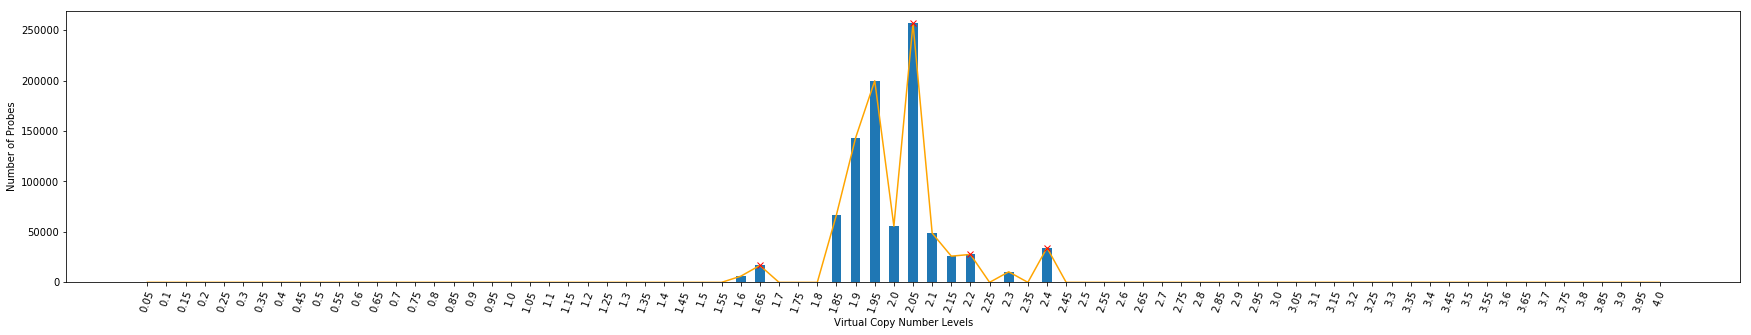

(2.05,
 0.4,
       score  neglects  base_bin  thresh_bin  base_value  thresh_value  \
 0  0.057032       0.0      1.65        2.05       16749        256486   
 1  0.057032       0.0      2.05        1.65      256486         16749   
 2  0.318126       0.0      1.65        2.20       16749         27667   
 3  0.318126       0.0      2.20        1.65       27667         16749   
 4  0.055526   27667.0      2.05        2.40      256486         34288   
 5  0.055526   27667.0      2.40        2.05       34288        256486   
 
    model_value  rank  levelScore  dupLevels    ...     score_28  rank_28  \
 0       273235     1           2          2    ...     0.369087      2.0   
 1       273235     1           0          1    ...     0.369087      2.0   
 2        44416     4           1          1    ...     0.369087      2.0   
 3        44416     4          -1          0    ...     0.369087      2.0   
 4       290774     0           0          1    ...     0.464968      4.0   
 5   

In [359]:
m.run(sam['segments'])

In [244]:
peaks

,value,bin,dist,cn,round,off,weight,scaled_off
0,292066,1.60,1.45,7.25,7.0,0.25,0.506373,0.126593
1,576780,2.00,1.05,5.25,5.0,0.25,1.000000,0.250000
2,68849,2.20,0.85,4.25,4.0,0.25,0.119368,0.029842
3,391498,2.35,0.70,3.50,3.0,0.50,0.678765,0.339382
4,15181,2.70,0.35,1.75,2.0,0.25,0.026320,0.006580
5,9392,3.05,0.00,0.00,0.0,0.00,0.016284,0.000000
6,21235,3.25,0.20,1.00,1.0,0.00,0.036816,0.000000


In [248]:
base = 2
thresh = 2.35
levels = peaks.loc[:,['bin', 'value']]
levels['relative_level'] = round((levels['bin'] - base) / abs(base-thresh)).astype(int)
(levels[levels.relative_level >0].relative_level.drop_duplicates())
# del_sum = sum(levels[levels.relative_level <0].relative_level.drop_duplicates())

NameError: name 'unique' is not defined

In [262]:
max(levels.relative_level)

4

In [259]:
min(levels[levels.relative_level <0].relative_level.drop_duplicates())

-1

In [261]:
levels[levels.relative_level]

KeyError: '[-1  0  1  1  2  3  4] not in index'

In [369]:
for sam in db.find():
    
    for seg in sam['segments']:
        if (seg['chro'] == '17') and (seg['value'] > 0.3):
            print('chr{}\t{}\t{}'.format(seg['chro'],seg['start'], seg['end']))

chr17	32253253	33717390
chr17	33720263	35271042
chr17	37683175	40675163
chr17	36818067	41122536
chr17	44174795	44343308
chr17	44346297	44643548
chr17	50017247	53750109
chr17	55391964	56010261
chr17	56709492	58936442
chr17	59798193	60479664
chr17	5599341	7148150
chr17	8732882	9020401
chr17	32239720	37792143
chr17	37793542	39348680
chr17	49320217	61245860
chr17	61245957	76087867
chr17	76090843	76566865
chr17	76567093	83090856
chr17	63859350	64645042
chr17	64663771	83000756
chr17	5049639	5396630
chr17	7736431	7922256
chr17	7926610	8517697
chr17	8524830	9777393
chr17	9783148	11011961
chr17	11012864	11136911
chr17	12911876	13182306
chr17	18192664	18386609
chr17	47425980	48090580
chr17	56799503	65383788
chr17	65394993	71390875
chr17	71391017	74132994
chr17	74134373	83090856
chr17	21494637	22736323
chr17	77664981	83090856
chr17	47608650	53189571
chr17	53194451	57142935
chr17	57143378	57362823
chr17	57369003	57713314
chr17	57713703	58524191
chr17	58529997	74904329
chr17	74909375	79877288
chr17

In [371]:
for sam in db.find():
    for seg in sam['segments']:
        if (seg['chro'] == '17') and (seg['value'] < -0.3):
            print('chr{}\t{}\t{}'.format(seg['chro'],seg['start'], seg['end']))

chr17	156898	22304701
chr17	45684889	46131308
chr17	156898	28414756
chr17	46156410	46214760
chr17	46270361	49269167
chr17	49415004	50001585
chr17	58963932	59798035
chr17	60496504	69886758
chr17	69887412	71948136
chr17	72637155	75796944
chr17	156898	51543089
chr17	51555046	51598401
chr17	51598517	83090856
chr17	7596031	8029470
chr17	14901390	18659407
chr17	21593333	26984218
chr17	10082524	29097298
chr17	48251305	59466445
chr17	156898	22646179
chr17	156898	14697627
chr17	15479474	18192664
chr17	58531040	62892145
chr17	11296587	11339011
chr17	11339518	12262979
chr17	12263022	12434217
chr17	13188166	18187705
chr17	18464064	20200247
chr17	51660378	52262307
chr17	156898	1574325
chr17	1584972	6333779
chr17	6338112	18957450
chr17	156898	18723595
chr17	156898	354968
chr17	6969664	7407503
chr17	9028182	9293662
chr17	11247576	11278285
chr17	11333249	11514836
chr17	11746461	14825547
chr17	15597819	17048391
chr17	18812329	18911663
chr17	19906640	20127647
chr17	156898	22520641
chr17	156898	9400982
c

In [376]:
np.log10(1.5)

0.17609125905568124